In [1]:
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd

# <font face="gotham" color="purple"> Concepts of Hypothesis Testing </font>

You all heard of **null hypothesis** and **alternative hypothesis**, depends on the evidences that we decide to reject the null hypothesis or not. However if we do not have evidences to reject null hypothesis, we can't say that we accept null hypothesis, rather we say that _we can't reject null hypothesis based on current information_.

Sometimes you might encounter the term of **type I error** and **type II error**, the former characterises the probability of rejecting a true null hypothesis, the latter characterises the probability of failing to reject a false null hypothesis. It might sounds counter-intuitive at first sight, but the plot below tells all story. 

The higher the significance level the lower probability of having type I error, but it increases the probability of having type II error.

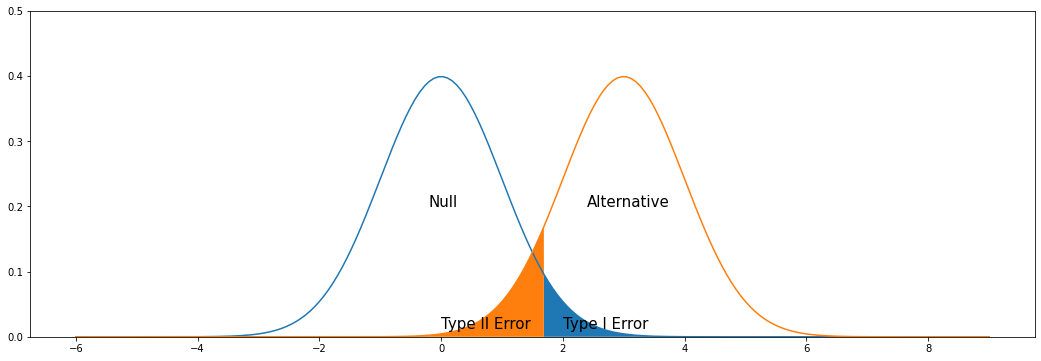

In [2]:
from plot_material import type12_error
type12_error()

If you are yet bewildered, here is the guideline, the blue shaded area are genuinely generated by null distribution, however they are too distant (i.e. $2\sigma$ away) from the mean ($0$ in this example), so they are mistakenly rejected, this is what we call _Type I Error_. 

The orange shaded area are actually generated by alternative distribution, however they are in the adjacent area of mean of null hypothesis, so we failed to reject they, but wrongly. And this is called _Type II Error_.

As you can see from the chart, if null distribution and alternative are far away from each other, the probability of both type of errors diminish to trivial. 

# <font face="gotham" color="purple"> Rejection Region and p-Value</font>

**Rejection region** is a range of values such that if the test statistic falls into that range, we decide to reject the null hypothesis in favour of the alternative hypothesis.

To put it another way, a value has to be far enough from the mean of null distribution to fall into rejection region, then the distance is the evidence that the value might not be produced by null distribution, therefore a rejection of null hypothesis.

Let's use some real data for illustration. The data format is ```.csv```, best tool is ```pandas``` library.

In [3]:
data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


Null and alternative hypothesis are
$$
H_0: \text{Average male height is 172}\newline
H_1: \text{Average male height isn't 172}
$$

Calculate the sample mean and standard deviation of male height

In [4]:
male_mean = data[data['Gender']=='Male']['Height'].mean()
male_std = data[data['Gender']=='Male']['Height'].std(ddof=1)
male_std_error = male_std/np.sqrt(len(data[data['Gender']=='Male']))
male_null = 172

The rejection region is simply an opposite view of expressing confidence interval
$$
\bar{x}>\mu + t_\alpha\frac{s}{\sqrt{n}}\\
\bar{x}<\mu - t_\alpha\frac{s}{\sqrt{n}}
$$

Assume significance level $5\%$, then $+t_\alpha = t_{.025}$ and $-t_{\alpha} = t_{.975}$, where $t_{.025}$ and $t_{.975}$ can be calculated by ```.stat.t.ppf```.

In [5]:
df = len(data[data['Gender']=='Male'])-1
t_975 = sp.stats.t.ppf(.975, df=df); t_975

1.9697339922715282

In [6]:
t_025 = sp.stats.t.ppf(.025, df=df); t_025

-1.9697339922715287

In [7]:
print('The rejection region of null hypothesis is <{} and >{}'.format(male_null - t_975*male_std_error, male_null + t_975*male_std_error))

The rejection region of null hypothesis is <169.85242784779035 and >174.14757215220965


whereas the ```male_mean``` falls into
the rejection region, we reject null hypothesis in favour of alternative hypothesis

In [8]:
male_mean

169.64897959183673

Alternatively we can construct $t$-statistic
$$
t=\frac{\bar{x}-\mu}{s/\sqrt{n}}
$$
Rejection region is where $t$-statistic larger or smaller than critical values
$$
t>t_{\alpha} = t_{.025} \text{   and   } t<t_{\alpha} = t_{.975}
$$


In [9]:
t = (male_mean - male_null)/(male_std_error); t

-2.1563349150893543

In this case, the $t$ statistic falls short than critical value $t_{.025}$, which also tells that the sample mean deviates about $2.15$ standard errors away from the mean of null hypothesis, fairly significant evidence to reject null hypothesis. We also say the test is **statistically significant**.

Here is the demonstration of rejection region in terms of both original unit (cm) and $t$-statistic, the rejection region are shaded in pink. Codes are messy, thus hidden in ```plot_material```.

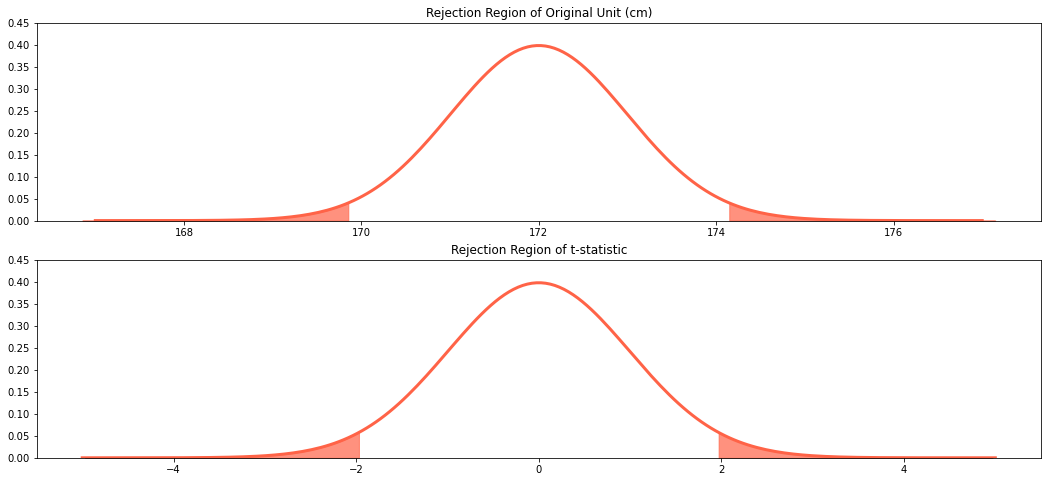

In [10]:
from plot_material import two_tail_rej_region_demo
two_tail_rej_region_demo()

Rejection region gives a yes or no answer, but **p-value** can give a probability how rare/extreme the test statistic is, given the null hypothesis is true. It can be easily retrieved by ```.stats.t.cdf``` function if the test statistic is negative as in our example, if positive then use ```1-.stats.t.cdf```. The p-value in our example is 

In [11]:
sp.stats.t.cdf(t, df = df)

0.016017555878266296

It indicates that if $H_0 = 172$ is true, the probability of a sample mean of $169.64$ or smaller has around $1.6\%$ probability. 

# <font face="gotham" color="purple"> One- or Two-Tail Test</font>

The height example is a two-tail test, meaning constructing rejecting region on both sides, there are one-tail tests as well
$$
H_0: \mu = \mu_0\\
H_1: \mu > \mu_0
$$
or 
$$
H_0: \mu = \mu_0\\
H_1: \mu < \mu_0
$$
Recall that in two-tail test, we divide the significance level by two, $2.5%$ on each side, but in one-tail test the significance level stays on either side as a whole.

The figure below is the demonstration of one-tail test with $5\%$ significance level on either side. The horizontal axis represents $t$-statistic.

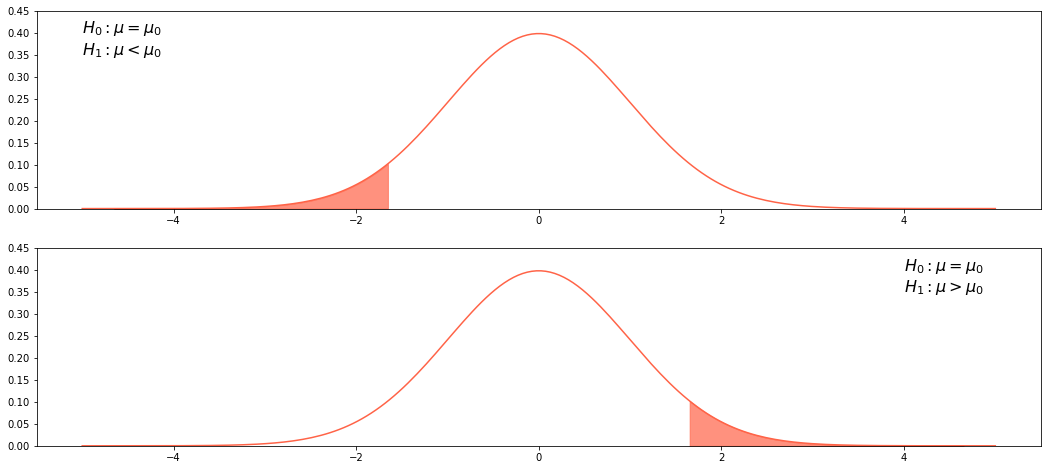

In [12]:
from plot_material import one_tail_rej_region_demo
one_tail_rej_region_demo()

# <font face="gotham" color="purple"> Inference About Difference Between Two Means</font>

If the difference of means of two population is the primary concern, for instance we'd like to investigate whether man and women's starting salary level differs, we still can develop interval estimator and hypothesis test as in previous examples.  

## <font face="gotham" color="purple"> Two Population With Known $\sigma_1$ and $\sigma_2$</font>

The point estimator of the difference of two population means is
$$
\bar{x}_1-\bar{x}_2
$$
and its standard error is 
$$
\sigma_{\bar{x}_{1}-\bar{x}_{2}}=\sqrt{\frac{\sigma_{1}^{2}}{n_{1}}+\frac{\sigma_{2}^{2}}{n_{2}}}
$$
if both populations have a normal distribution, then sampling distribution of $\bar{x}_1-\bar{x}_2$ also have a normal distribution. Then the $z$ statistic has a normal distribution
$$
z=\frac{\left(\bar{x}_{1}-\bar{x}_{2}\right)-(\mu_1-\mu_2)}{\sqrt{\frac{\sigma_{1}^{2}}{n_{1}}+\frac{\sigma_{2}^{2}}{n_{2}}}}
$$

The interval estimator with known $\sigma_1$ and $\sigma_2$ is constructed by rearranging $z$-statistic
$$
\bar{x}_{1}-\bar{x}_{2} \pm z_{\alpha / 2} \sqrt{\frac{\sigma_{1}^{2}}{n_{1}}+\frac{\sigma_{2}^{2}}{n_{2}}}
$$

We can simulate a case of population height, first create two populations of male and female with $\mu_1 = 175$ and $\mu_2 = 170$, also $\sigma_1=10$ and $\sigma_2=8$.

In [13]:
male_population = sp.stats.norm.rvs(loc=175,scale=10,size=10000) # generate male population of 10000
female_population = sp.stats.norm.rvs(loc=170,scale=8,size=10000) # generate famale population of 10000

male_sample = np.random.choice(male_population, 100) # take sample
female_sample = np.random.choice(female_population, 100)

male_sample_mean = np.mean(male_sample) 
female_sample_mean = np.mean(female_sample)

standard_error = np.sqrt(10**2/100+8**2/100) 

LCL = male_sample_mean-female_sample_mean - sp.stats.norm.ppf(.975)*standard_error # lower confidence level
UCL = male_sample_mean-female_sample_mean + sp.stats.norm.ppf(.975)*standard_error

print('Point estimate of the difference of the population means is {:.2f}.'.format(male_sample_mean-female_sample_mean))
print('Confidence interval of the difference of the population means is ({:.2f}, {:.2f}).'.format(LCL, UCL))

Point estimate of the difference of the population means is 3.45.
Confidence interval of the difference of the population means is (0.94, 5.96).


There are three forms of hypothesis

$$
\begin{array}{lll}
H_{0}: \mu_{1}-\mu_{2} \geq D_{0} & H_{0}: \mu_{1}-\mu_{2} \leq D_{0} & H_{0}: \mu_{1}-\mu_{2}=D_{0} \\
H_{\mathrm{1}}: \mu_{1}-\mu_{2} < D_{0} & H_{\mathrm{1}}: \mu_{1}-\mu_{2}>D_{0} & H_{\mathrm{1}}: \mu_{1}-\mu_{2} \neq D_{0}
\end{array}
$$

The $z$ statistic test has the same mechanism as in one population inference, we would like to know how many standard deviation away from the null hypothesis of difference of population mean.
$$
z=\frac{\left(\bar{x}_{1}-\bar{x}_{2}\right)-D_{0}}{\sqrt{\frac{\sigma_{1}^{2}}{n_{1}}+\frac{\sigma_{2}^{2}}{n_{2}}}}=\frac{\left(\bar{x}_{1}-\bar{x}_{2}\right)-(\mu_1-\mu_2)}{\sqrt{\frac{\sigma_{1}^{2}}{n_{1}}+\frac{\sigma_{2}^{2}}{n_{2}}}}
$$
Back to our example, suppose our hypothesis is the men and women has the same average height
$$
H_0:\mu_1-\mu_2 = 0\\
H_1:\mu_1-\mu_2 \neq 0
$$

We actually know that we will reject null hypothesis, because data generation parameter is $\mu_1=175$ and $\mu_2=170$, here is the results

In [14]:
z = ((male_sample_mean - female_sample_mean) - 0)/standard_error
p_value = 1 - sp.stats.norm.cdf(z)
print('z statistic: {:.2f}'.format(z))
print('p-Value: {}'.format(p_value))

z statistic: 2.70
p-Value: 0.0035124105030215347


We reject the null hypothesis $\mu_1=\mu_2$ in favour of alternative hypothesis $\mu_1\neq\mu_2$.

## <font face="gotham" color="purple"> Two Population With Unknown $\sigma_1$ and $\sigma_2$</font>

As you have guess, interval estimator with two population with unknown $\sigma_1$ and $\sigma_2$ is 
$$
\bar{x}_{1}-\bar{x}_{2} \pm t_{\alpha / 2} \sqrt{\frac{s_{1}^{2}}{n_{1}}+\frac{s_{2}^{2}}{n_{2}}}
$$
And $t$-statistic
$$
t=\frac{\left(\bar{x}_{1}-\bar{x}_{2}\right)-D_{0}}{\sqrt{\frac{s_{1}^{2}}{n_{1}}+\frac{s_{2}^{2}}{n_{2}}}}
$$
However the degree of freedom has a nastier form
$$
d f=\frac{\left(\frac{s_{1}^{2}}{n_{1}}+\frac{s_{2}^{2}}{n_{2}}\right)^{2}}{\frac{1}{n_{1}-1}\left(\frac{s_{1}^{2}}{n_{1}}\right)^{2}+\frac{1}{n_{2}-1}\left(\frac{s_{2}^{2}}{n_{2}}\right)^{2}}
$$


Besides that, rest of procedures are the same.

In [15]:
male_sample_variance = np.var(male_sample, ddof=1)
female_sample_variance = np.var(female_sample, ddof=1)

standard_error_unknown = np.sqrt(male_sample_variance/100+female_sample_variance/100)
df = standard_error_unknown**4/(1/99*(male_sample_variance/100)**2 + 1/99*(female_sample_variance/100)**2)

LCL = male_sample_mean-female_sample_mean - sp.stats.t.ppf(.975, df=df)*standard_error_unknown
UCL = male_sample_mean-female_sample_mean + sp.stats.t.ppf(.975, df=df)*standard_error_unknown

print('Degree of freedom: {:.0f}'.format(df))
print('t-statistic: {:.4f}'.format(((male_sample_mean - female_sample_mean) - 0)/standard_error_unknown))
print('Confidence interval of the difference of the population means is ({:.2f}, {:.2f}).'.format(LCL, UCL))

Degree of freedom: 185
t-statistic: 2.6408
Confidence interval of the difference of the population means is (0.87, 6.03).


# <font face="gotham" color="purple"> Inference About Difference Between Two Population Proportions</font>

This is one of most widely used inference technique in business field. We will introduce it by walking through an example. 

## <font face="gotham" color="purple"> Do Banks Discriminate Against Women Clients?</font>

A market research company just surveyed $3139$ business owners, of whom $649$ are female. $59$ women were turned down when applying for a business loan, in contrast $128$ men were turned down.

What we would like to know is if banks have possible gender bias?

The sample proportions of loan rejections are
$$
\hat{p}_1=\frac{59}{649}=9.0\%\\
\hat{p}_2=\frac{128}{2490}=5.1\%
$$

where $\hat{p}_1$ and $\hat{p}_2$ are rejection proportion of women and men respectively.

You certainly can stop here and report these numbers with a conclusion that women clients are indeed discriminated. But we can also take a more scientific attitude, to minimise the possibility of a fluke. Therefore we continue the hypothesis testing.

Hypotheses specified as
$$
H_0: p_1 - p_2=0\\
H_1:  p_1 - p_2>0
$$
If we know $p_1$ and $p_2$, the standard error of sample distribution of $\hat{p}_1-\hat{p}_2$ is 
$$
\sigma_{\hat{p}_1-\hat{p}_2}=\sqrt{\frac{p_1(1-p_1)}{n_1}+\frac{p_2(1-p_2)}{n_2}}
$$
Unfortunately, we know nothing about them. However null hypothesis $p_1=p_2$ allows us to formulate a **pooled proportion estimate**,
$$
\hat{p}=\frac{x_1+x_2}{n_1+n_1}
$$
The standard error becomes
$$
\sigma_{\hat{p}_1-\hat{p}_2}=\sqrt{\hat{p}(1-\hat{p})\bigg(\frac{1}{n_1}+\frac{1}{n_2}\bigg)}
$$

Pooled proportion estimates is

In [16]:
p_hat = (59 + 128)/(649 + 2490)
sigma = np.sqrt(p_hat*(1-p_hat)*(1/649+1/2490))

Value of test statistic is

$$
z=\frac{\hat{p}_1-\hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})\bigg(\frac{1}{n_1}+\frac{1}{n_2}\bigg)}}
$$

In [17]:
z = (.09-0.051)/sigma
print('Test statistic of z is {:.4f}.'.format(z))

Test statistic of z is 3.7386.


Without checking the critical value, we could safely conclude a fail to null hypothesis after seeing a test statistic great than $3$.

# <font face="gotham" color="purple"> Inference About A Population Variance</font>

Previously we have seen the pointer estimator of $\sigma^2$ is 
$$
s^2=\frac{\Sigma\left(x_{i}-\bar{x}\right)^{2}}{n-1}
$$
However because of a square, it doesn't have the familiar normal or $t$-statistic. The test statistic of $\sigma^2$ has a $\chi^2$ distribution
$$
\chi^2=\frac{(n-1) s^{2}}{\sigma^{2}_0}
$$
with $\nu =n-1$ degree of freedom. With some algebraic manipulation, the confidence interval estimator of $95\%$ confidence level is
$$
\frac{(n-1) s^{2}}{\chi_{.025}^{2}} \leq \sigma^{2} \leq \frac{(n-1) s^{2}}{\chi_{.975}^{2}}
$$
where $\chi^2_{0.025}$
To use our generated population height data, let's assume we want to know if variance of female height is less than $50$, hypotheses are
$$
H_0: \sigma^2 \geq 50\\
H_1: \sigma^2 <50
$$

In [18]:
chi_square_statistic = len(female_sample)*female_sample_variance/50
df = len(female_sample)-1
LCL = df*female_sample_variance/sp.stats.chi2.ppf(.975, df=df)
UCL = df*female_sample_variance/sp.stats.chi2.ppf(.025, df=df)
print('Female sample variance: {}'.format(female_sample_variance))
print('Chi-square statistic: {}.'.format(chi_square_statistic))
print('p-value: {}.'.format(sp.stats.chi2.cdf(chi_square_statistic, df=df)))
print('Confidence interval: ({:.2f}, {:.2f})'.format(LCL, UCL))

Female sample variance: 62.73551874633837
Chi-square statistic: 125.47103749267676.
p-value: 0.9626315704731796.
Confidence interval: (48.36, 84.66)


Hypothesis test states that we don't have evidence to reject null hypothesis.